In [9]:
import numpy as np

np.random.seed(42)

T, N = 200, 100
dx, dz, dy, K = 3, 3, 3, 1   # covariates=3, latent=3, response=3, 1 component

X = np.random.randn(T, N, dx)        # covariates
Z = np.zeros((T, N, dz))             # latent (iid per observation)
Y = np.zeros((T, N, dy))             # response
labels = np.zeros((T, N), dtype=int) # always 0 now

# random weights for one component
u = np.random.randn(dx+dz)
v = np.random.randn(dx+dz)
w = np.random.randn(dx+dz)
d = np.random.randn(dx+dz)


import numpy as np

def generate_data(X, mean_func, sigma_func, change_point=100):
    """
    Generate time series data with latent Z and given mean/sigma functions.

    Parameters
    ----------
    X : np.ndarray
        Covariates, shape (T, N, dx)
    mean_func : callable
        Function mean_func(h, z) -> (dy,)
    sigma_func : callable
        Function sigma_func(h, z) -> (dy,)
    change_point : int, default=100
        Time index where Z distribution changes

    Returns
    -------
    X : np.ndarray (T, N, dx)
    Y : np.ndarray (T, N, dy)
    Z : np.ndarray (T, N, dz)
    """
    T, N, dx = X.shape
    dz = 3
    test_h = np.concatenate([X[0,0], np.zeros(dz)])
    dy = mean_func(test_h, np.zeros(dz)).shape[0]

    Z = np.zeros((T, N, dz))
    Y = np.zeros((T, N, dy))

    for t in range(T):
        for n in range(N):
            if t < change_point:   # before change-point
                z = np.random.normal(0, 1, dz)
            else:                  # after change-point
                z = np.random.normal(5, 1, dz)
            Z[t,n] = z

            h = np.concatenate([X[t,n], z])
            mu = mean_func(h, z)
            sigma = sigma_func(h, z)
            Y[t,n] = np.random.normal(mu, sigma)

    return X, Y, Z



X_all: (200, 100, 3)
Y_all: (200, 100, 3)
Z_all: (200, 100, 3)


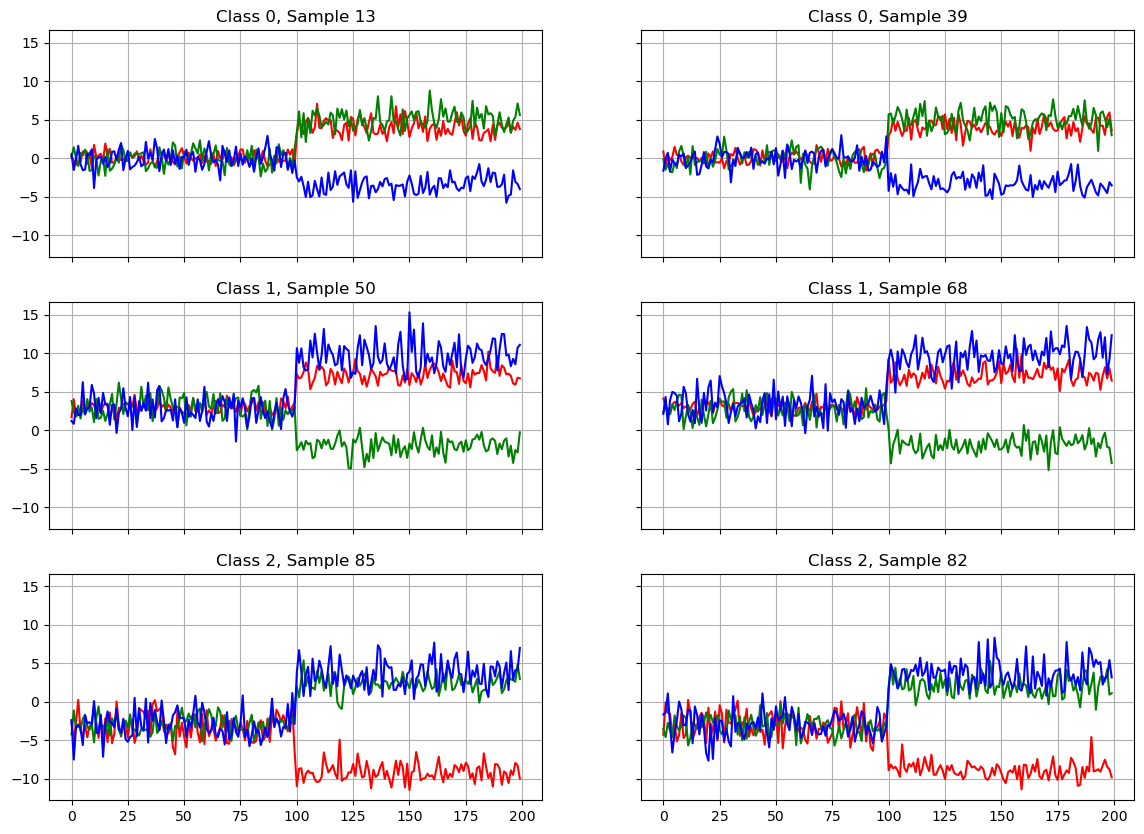

In [ ]:
np.random.seed(42)

def mean_func(h, z):
    return np.array([
        np.tanh(h @ u) + z[0],
        np.sin(h @ v) + z[1],
        0.5*(h @ w) - z[2]
    ])

def sigma_func(h, z):
    val = 0.1 * abs(h @ d) + 0.01 * abs(z[0])
    sigma = 0.1 + 0.1 * np.tanh(val)   
    return sigma * np.ones(dy)
T, N, dx, dz, dy = 200, 50, 3, 3, 3
X = np.random.randn(T, N, dx)
X_out_1, Y_out_1, Z_out_1 = generate_data(X, mean_func, sigma_func, change_point=100)

def mean_func(h, z):
    return np.array([
        np.tanh(h @ u) + z[0]+3,
        np.sin(h @ v) - z[1]+3,
        0.5*(h @ w) + z[2] + 3
    ])
T, N, dx, dz, dy = 200, 30, 3, 3, 3
X = np.random.randn(T, N, dx)
X_out_2, Y_out_2, Z_out_2 = generate_data(X, mean_func, sigma_func, change_point=100)

def mean_func(h, z):
    return np.array([
        np.tanh(h @ u) - z[0]-3,
        np.sin(h @ v) + z[1]-3,
        0.5*(h @ w) + z[2] - 3
    ])
T, N, dx, dz, dy = 200, 20, 3, 3, 3
X = np.random.randn(T, N, dx)
X_out_3, Y_out_3, Z_out_3 = generate_data(X, mean_func, sigma_func, change_point=100)

X_all = np.concatenate([X_out_1, X_out_2, X_out_3], axis=1)
Y_all = np.concatenate([Y_out_1, Y_out_2, Y_out_3], axis=1)
Z_all = np.concatenate([Z_out_1, Z_out_2, Z_out_3], axis=1)

N1, N2, N3 = 50, 30, 20

labels = np.concatenate([
    np.zeros(N1, dtype=int),    
    np.ones(N2, dtype=int),        
    np.full(N3, 2, dtype=int)   
])

print("X_all:", X_all.shape)
print("Y_all:", Y_all.shape)
print("Z_all:", Z_all.shape)



In [3]:
import numpy as np
import pandas as pd
import os


os.makedirs("./sim_data", exist_ok=True)

def save_array(arr, name):

    T, N, D = arr.shape
    time_idx = np.repeat(np.arange(T), N)          # (T*N,)
    sample_idx = np.tile(np.arange(N), T)          # (T*N,)
    flat = arr.reshape(T*N, D)                     # (T*N, D)

    df = pd.DataFrame(flat, columns=[f"dim{j+1}" for j in range(D)])
    df.insert(0, "sample", sample_idx)
    df.insert(0, "time", time_idx)
    
    out_path = f"./sim_data/{name}.csv"
    df.to_csv(out_path, index=False)
    print(f"Saved {out_path}, shape={df.shape}")


save_array(X_all, "x_all")
save_array(Y_all, "y_all")
save_array(Z_all, "z_all")


Saved ./sim_data/x_all.csv, shape=(20000, 5)
Saved ./sim_data/y_all.csv, shape=(20000, 5)
Saved ./sim_data/z_all.csv, shape=(20000, 5)


In [10]:
def mean_func(h, z):
    return np.array([
        np.tanh(h @ u) + z[0],
        np.sin(h @ v) + z[1],
        0.5*(h @ w) - z[2]
    ])

def sigma_func(h, z):
    val = 0.1 * abs(h @ d) + 0.01 * abs(z[0])
    sigma = 0.1 + 0.1 * np.tanh(val)   
    return sigma * np.ones(dy)
T, N, dx, dz, dy = 200, 100, 3, 3, 3
X = np.random.randn(T, N, dx)
X_all, Y_all, Z_all = generate_data(X, mean_func, sigma_func, change_point=100)

save_array(X_all, "x_all_1comp")
save_array(Y_all, "y_all_1comp")
save_array(Z_all, "z_all_1comp")

Saved ./sim_data/x_all_1comp.csv, shape=(20000, 5)
Saved ./sim_data/y_all_1comp.csv, shape=(20000, 5)
Saved ./sim_data/z_all_1comp.csv, shape=(20000, 5)
